In [10]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tiktoken
import pandas as pd
import numpy as np

In [2]:
# Load tokenizer and model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [3]:
# Create sentiment pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Device set to use cpu


In [4]:
df = pd.read_csv(r'C:\Users\Rahul Mathew\Desktop\Python\ML pipeline\test_gplay_reviews.csv')

In [5]:
df = df.fillna('None')
print('Line 20')
sentiments = sentiment_analyzer(df['Review'].tolist())
print('Line 22')
def label_to_sentiment(sentiment):
    if sentiment == 'LABEL_0':
        return -1
    elif sentiment == 'LABEL_1':
        return 0
    else:
        return 1

Line 20
Line 22


In [23]:
y_pred = np.array([label_to_sentiment(item['label']) for item in sentiments])
y_test = np.array(df['Rating'])

In [7]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.92      0.59      0.72      3340
           0       0.04      0.29      0.06       336
           1       0.94      0.79      0.86      7633

    accuracy                           0.72     11309
   macro avg       0.63      0.56      0.55     11309
weighted avg       0.91      0.72      0.79     11309



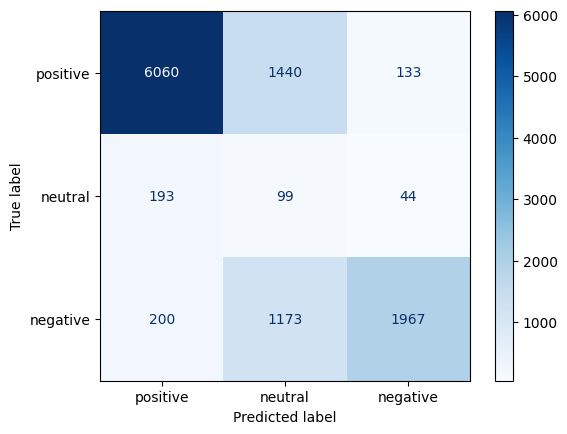

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "neutral", "negative"])
disp.plot(cmap='Blues')
plt.show()

# Error Analysis

In [17]:
errors = ~(np.array(y_test) == np.array(y_pred))

In [18]:
wrongly_classified = df['Review'][errors]
len(wrongly_classified)

3183

In [20]:
for item in df['Review'][errors].sample(n=len(wrongly_classified)//10):
    print(item)

Person that shake
old songs
Expensive
nice kuku fm
my money auto matic cut this is a frod
ghatiya app bekka
Mera paysa kat liya
passe oto matk kat jata hai frode app
good
Sab kuch paise pe h
paise bhara fakt
BEKAR JB 2 KA PRIME MIL RHA HAI TO 299 KYU?????
super
it's just nothing without subscription
best
bakwas
very bed
Sab ko koi bhi jankari chahiye to kuku app download karo. is Mai sex , love ,all bahut kuch sikhne ko milta hai.
super
Excellent
, App app , Reveiw , Kuku FM Scam , . reveiw Kuku FM App Uninstall |
New episode regularly uploaded
best of muny
Paisa nai hai isliye 1 star
gud
Good
kharab h
Chor h ye log pese kat lete h khud hi use karo ya na karo
bina parmisan ke rupay kat liye
MUSA bhai
super
Don't login this app and Automation payment is done but application is again to again aks payment
Inka video clip kaha hai
Nice
Super story's
Jijaj
not download this app this is a froud app this app my 399 rupe kate koi mat karna yeh account se paise kat leta hai
ek number ka ghatiya

#### Among the True Positives the wrongly classified ones are mostly Predicted as Neutral. 

So find out all the reviews which are actually Positive (True Positives) but predicted as Neutral (False Neutral)

In [24]:
ind_tp = np.where(y_test == 1)[0]
ind_pred_n = np.where(y_pred == 0)[0]

common = np.intersect1d(ind_tp, ind_pred_n)

for i in np.random.choice(common, size=len(common)//10, replace=False):
    print(df['Review'][i])

supper app 5 start
okay
super application
super
Super storesust watch all
wow
hii *QR
Exellent app
Mast
wow
thank
Osm
super...
Motivation
N G RATHOD
Super app mera ponr dekhna band ho gya
please add more books related business and investments
X** and work
Good experience but quince not saficient
Bahut acchi aur interesting storys Hai kuku FM main maine Apne friends ko bhi recommend Kiya Hai
supar
best
Overall, I really like this app. However, I recently encountered an issue with the goal streak, and when I reached out to support, they claimed it was resolved, but it actually wasnt. Even though I was completing episodes, the goal streak didn't update for several days, which made me think there was a major issue. After a few days, the goal streak reset, and its working fine now. Thats why Im giving a 4/5 ratingbecause the communication was lacking, which was disappointing for me.
Dear sir -
DHA sir GM ga sath beech ka din
good but not have Tamil version to all important books, countable 

### Among the True Neutrals the wrongly classified ones are mostly Predicted as Positives

So find out all the reviews which are actually Neutral (True Neutral) but predicted as Positives (False Positive)

In [25]:
ind_tn = np.where(y_test == 0)[0]
ind_pred_p = np.where(y_pred == 1)[0]

common = np.intersect1d(ind_tn, ind_pred_p)

for i in np.random.choice(common, size=len(common)//10, replace=False):
    print(df['Review'][i])

nice
good very clear
Good story
great app
Good
nice
Good
very interesting story and full knowledge
It us good
Good
nice
good
good
Good
Good job.
this is amazing app
nice
good
nice


### Among the True Negatives the wrongly classified ones are mostly Predicted as Neutral

So find out all the reviews which are actually Negative (True Negative) but predicted as Neutral (False Neutral)

In [26]:
ind_tneg = np.where(y_test == -1)[0]
ind_pred_n = np.where(y_pred == 0)[0]

common = np.intersect1d(ind_tneg, ind_pred_n)

for i in np.random.choice(common, size=len(common)//10, replace=False):
    print(df['Review'][i])

VIP mod ko hatyo please
7 din ka free ka lalach dete hai fhir 299 rs cut kr lete a/c automatic pls koi bhi 7 din k subscription na le
bkwash hai ye app froud krta hai din dhre
payment done but not suscribe.
add gujarati language
bedly
How can i stop auto pay option?
bohot bakwas he 2 rupees bolke 499 leta he
kuku fm ekdum bakwas hai jo subscription lene per bhi premium content nahi deta hai sub log sawdhan rahe
Chor hai mera 300 rupees kat liya
This app told you buy gold or vip
You told me 2 rupees after recharging and automatically cut 299 rupees, you showed the video on Fm Instagram and listened to the audio here. Anyway, we will upload some good stories, otherwise we will delete them.
frot app
West app
Chor hai fm wala Bina bataye pese leta hai 2 rupe ka lalach deta hai 299 chura leta hai chor
ak dam farzi app h kuku fm please koi download nhi re mere 500 rupye kt gye apne aap hi es app pr
koi bhi ye aap install mat karna ye paise katta hai maine sirf 1 din hi use Kiya fir mujhe pas